In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import os.path
from saveDataset import save_data

# Helper libraries
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import glob, os
import re

# Pillow
import PIL
from PIL import Image

set rootpath= path of the directory containing 'image-recognition-tensorflow-master'

In [2]:
rootpath='D:\hackathon'

In [3]:
# Use Pillow library to convert an input jpeg to a 8 bit grey scale image array for processing.
def jpeg_to_8_bit_greyscale(path, maxsize):
        img = Image.open(path).convert('L')   # convert image to 8-bit grayscale
        # Make aspect ratio as 1:1, by applying image crop.
    # Please note, croping works for this data set, but in general one
    # needs to locate the subject and then crop or scale accordingly.
        WIDTH, HEIGHT = img.size
        if WIDTH != HEIGHT:
                m_min_d = min(WIDTH, HEIGHT)
                img = img.crop((0, 0, m_min_d, m_min_d))
        # Scale the image to the requested maxsize by Anti-alias sampling.
        img.thumbnail(maxsize, PIL.Image.ANTIALIAS)
        return np.asarray(img)

In [4]:
def load_image_dataset(path_dir, maxsize):
        images = []
        labels = []
        os.chdir(path_dir)
        for file in glob.glob("*.jpg"):
                img = jpeg_to_8_bit_greyscale(file, maxsize)
#                 if re.match('chihuahua.*', file):
                if re.match('plastic.*', file):
                        images.append(img)
                        labels.append(0)
#                 elif re.match('muffin.*', file):
                elif re.match('paper.*', file):
                        images.append(img)
                        labels.append(1)
                else:
                    images.append(img)
                    labels.append(1)
        return (np.array(images), np.array(labels))

In [5]:
def shuffle_examples(X,Y):
    dim= X.shape
    X= np.reshape(X,(X.shape[0],-1))
    Y=Y.reshape(-1,1)
    X= np.append(X, Y, axis=1)
    
    np.random.seed(0)
    np.random.shuffle(X)
    
    A=np.array([])
    
    for i in range(X.shape[1]-1):
        if i==0:
            A= np.array(X[:,i]).reshape(-1,1)
        else:
            A=np.append(A,np.array(X[:,i]).reshape(-1,1),axis=1)

    Y= np.array(X[:,X.shape[1]-1])
    
    A= np.reshape(A,dim)
    
    return A,Y
    

In [6]:
maxsize = 100, 100

In [7]:
if(os.path.exists(rootpath+'\image-recognition-tensorflow-master\train_images.npy')==False):
    (train_images, train_labels) = load_image_dataset(rootpath+'\image_classification\plastic_paper', maxsize)
    (test_images, test_labels) = load_image_dataset(rootpath+'\image_classification\plastic_paper/test_set', maxsize)

#     (train_images, train_labels) = load_image_dataset(rootpath+'\image_classification\chihuahua-muffin', maxsize)
#     (test_images, test_labels) = load_image_dataset(rootpath+'\image_classification\chihuahua-muffin/test_set', maxsize)
    print(train_images.shape)
    train_images, train_labels = shuffle_examples(train_images, train_labels)
    test_images, test_labels = shuffle_examples(test_images, test_labels)
    print('here')
    data={
        'train_images': np.reshape(train_images,(train_images.shape[0],-1)),
        'train_labels':train_labels.reshape(-1,1),
        'test_images':np.reshape(test_images,(test_images.shape[0],-1)),
        'test_labels':test_labels.reshape(-1,1)
    }
#     save_data(data)
    
else:
    print('found')
    train_images = np.load('train_images.npy')
    train_labels = np.load('train_labels.npy')
    test_images = np.load('test_images.npy')
    test_labels = np.load('test_labels.npy')
    
    train_images= np.reshape(train_images,(train_images.shape[0],maxsize))
    test_images= np.reshape(test_images,(test_images.shape[0],maxsize))



(876, 100, 100)
here


In [8]:
# class_names = ['chihuahua', 'muffin']
class_names = ['plastic', 'paper']




In [9]:

print(train_images.shape)

(876, 100, 100)


In [10]:

print(train_labels.shape)

(876,)


In [11]:
print(test_images.shape)
print(test_labels)

(200, 100, 100)
[1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0
 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0
 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1
 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0
 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0
 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0]


In [12]:
def display_images(images, labels):
        plt.figure(figsize=(10,10))
        grid_size = min(25, len(images))
        for i in range(grid_size):
                plt.subplot(5, 5, i+1)
                plt.xticks([])
                plt.yticks([])
                plt.grid(False)
                plt.imshow(images[i], cmap=plt.cm.binary)
                plt.xlabel(class_names[labels[i]])

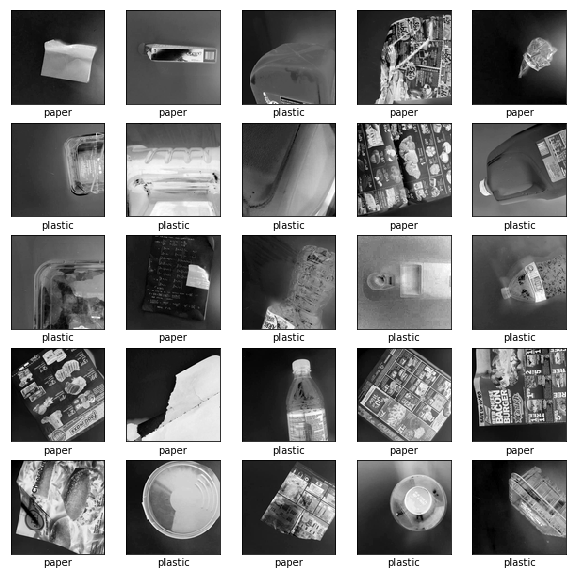

In [13]:
display_images(train_images, train_labels)
plt.show()

In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0
print(train_images.shape)
print(test_images.shape)

(876, 100, 100)
(200, 100, 100)


In [15]:
# Setting up the layers.

# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(100, 100)),
#         keras.layers.Dense(128, activation=tf.nn.sigmoid),
#         keras.layers.Dense(16, activation=tf.nn.sigmoid),
#     keras.layers.Dense(2, activation=tf.nn.softmax)
# ])

model = keras.models.Sequential([
                keras.layers.Flatten(input_shape = ( 100, 100)),
                keras.layers.Dense(512, activation=tf.nn.relu),
                keras.layers.Dropout(0.5),
                keras.layers.Dense(128, activation=tf.nn.relu),
                keras.layers.Dense(16, activation=tf.nn.relu),
        keras.layers.Dense(2, activation=tf.nn.softmax)
        ])

# model = keras.models.Sequential([
#                 keras.layers.Flatten(input_shape = ( 100, 100)),
#                 keras.layers.Dense(1024, activation=tf.nn.relu),
#                 keras.layers.Dropout(0.5),
#                 keras.layers.Dense(512, activation=tf.nn.relu),
#                 keras.layers.Dropout(0.5),
#                 keras.layers.Dense(64, activation=tf.nn.relu),
#                 keras.layers.Dense(16, activation=tf.nn.relu),
#         keras.layers.Dense(2, activation=tf.nn.softmax)
#         ])

In [16]:
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-5, momentum=0.7, nesterov=True)

model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.fit(train_images, train_labels, epochs=100)

Train on 876 samples
Epoch 1/100
876/876 [==============================] - 2s 2ms/sample - loss: 0.7219 - accuracy: 0.5057
Epoch 2/100
876/876 [==============================] - 1s 1ms/sample - loss: 0.6888 - accuracy: 0.5537
Epoch 3/100
876/876 [==============================] - 1s 1ms/sample - loss: 0.6880 - accuracy: 0.5377
Epoch 4/100
876/876 [==============================] - 1s 973us/sample - loss: 0.6885 - accuracy: 0.5479
Epoch 5/100
876/876 [==============================] - 1s 907us/sample - loss: 0.6898 - accuracy: 0.5616
Epoch 6/100
876/876 [==============================] - 1s 922us/sample - loss: 0.6805 - accuracy: 0.5799
Epoch 7/100
876/876 [==============================] - 1s 943us/sample - loss: 0.6915 - accuracy: 0.5491
Epoch 8/100
876/876 [==============================] - 1s 976us/sample - loss: 0.6845 - accuracy: 0.5662
Epoch 9/100
876/876 [==============================] - 1s 1ms/sample - loss: 0.6826 - accuracy: 0.5765
Epoch 10/100
876/876 [====================

876/876 [==============================] - 1s 901us/sample - loss: 0.5722 - accuracy: 0.6712
Epoch 79/100
876/876 [==============================] - 1s 903us/sample - loss: 0.5788 - accuracy: 0.6632
Epoch 80/100
876/876 [==============================] - 1s 894us/sample - loss: 0.5829 - accuracy: 0.6621
Epoch 81/100
876/876 [==============================] - 1s 886us/sample - loss: 0.5763 - accuracy: 0.6906
Epoch 82/100
876/876 [==============================] - 1s 886us/sample - loss: 0.5649 - accuracy: 0.6906
Epoch 83/100
876/876 [==============================] - 1s 886us/sample - loss: 0.5680 - accuracy: 0.6724
Epoch 84/100
876/876 [==============================] - 1s 889us/sample - loss: 0.5756 - accuracy: 0.6610
Epoch 85/100
876/876 [==============================] - 1s 912us/sample - loss: 0.5637 - accuracy: 0.6678
Epoch 86/100
876/876 [==============================] - 1s 903us/sample - loss: 0.5898 - accuracy: 0.6381
Epoch 87/100
876/876 [==============================] - 1s 

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

200/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [19]:
predictions = model.predict(test_images)

In [20]:
print(predictions)

[[0.26603174 0.7339683 ]
 [0.73976916 0.26023078]
 [0.38602567 0.61397433]
 [0.4832769  0.51672304]
 [0.45545503 0.54454494]
 [0.81143    0.18857001]
 [0.22768436 0.7723156 ]
 [0.70205635 0.29794368]
 [0.42914805 0.570852  ]
 [0.62963915 0.37036085]
 [0.07004172 0.9299583 ]
 [0.47914052 0.5208594 ]
 [0.7336211  0.26637894]
 [0.22063522 0.77936476]
 [0.43868458 0.56131536]
 [0.26005155 0.7399484 ]
 [0.33016965 0.6698304 ]
 [0.623157   0.37684307]
 [0.33569592 0.664304  ]
 [0.425421   0.574579  ]
 [0.7263868  0.27361324]
 [0.27469513 0.7253049 ]
 [0.04190475 0.95809525]
 [0.36834908 0.6316509 ]
 [0.2745786  0.7254214 ]
 [0.61762923 0.38237074]
 [0.65022415 0.34977582]
 [0.7339374  0.26606262]
 [0.29605493 0.7039451 ]
 [0.29129305 0.708707  ]
 [0.29310417 0.70689577]
 [0.65632254 0.3436775 ]
 [0.77115124 0.22884877]
 [0.62359756 0.3764025 ]
 [0.45465758 0.5453424 ]
 [0.10536558 0.8946345 ]
 [0.68378705 0.3162129 ]
 [0.46808    0.5319199 ]
 [0.0052169  0.9947831 ]
 [0.566795   0.433205  ]


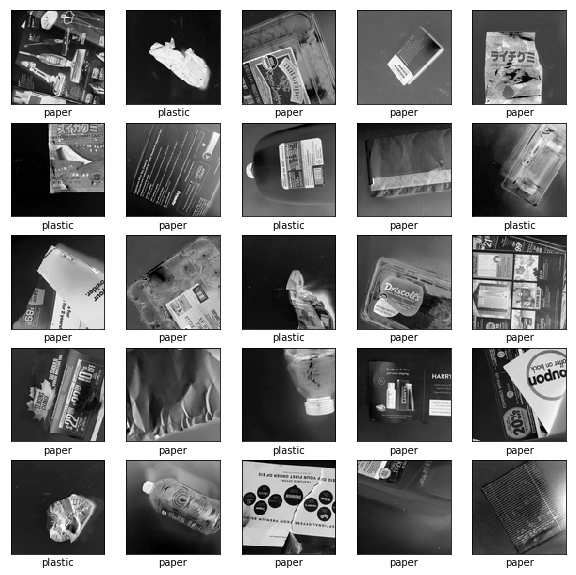

In [21]:
display_images(test_images, np.argmax(predictions, axis = 1))
plt.show()

keep the images you want to classify in 'unknown' folder

[[0.26603174 0.7339683 ]
 [0.73976916 0.26023078]
 [0.38602567 0.61397433]
 [0.4832769  0.51672304]
 [0.45545503 0.54454494]
 [0.81143    0.18857001]
 [0.22768436 0.7723156 ]
 [0.70205635 0.29794368]
 [0.42914805 0.570852  ]
 [0.62963915 0.37036085]
 [0.07004172 0.9299583 ]
 [0.47914052 0.5208594 ]
 [0.7336211  0.26637894]
 [0.22063522 0.77936476]
 [0.43868458 0.56131536]
 [0.26005155 0.7399484 ]
 [0.33016965 0.6698304 ]
 [0.623157   0.37684307]
 [0.33569592 0.664304  ]
 [0.425421   0.574579  ]
 [0.7263868  0.27361324]
 [0.27469513 0.7253049 ]
 [0.04190475 0.95809525]
 [0.36834908 0.6316509 ]
 [0.2745786  0.7254214 ]
 [0.61762923 0.38237074]
 [0.65022415 0.34977582]
 [0.7339374  0.26606262]
 [0.29605493 0.7039451 ]
 [0.29129305 0.708707  ]
 [0.29310417 0.70689577]
 [0.65632254 0.3436775 ]
 [0.77115124 0.22884877]
 [0.62359756 0.3764025 ]
 [0.45465758 0.5453424 ]
 [0.10536558 0.8946345 ]
 [0.68378705 0.3162129 ]
 [0.46808    0.5319199 ]
 [0.0052169  0.9947831 ]
 [0.566795   0.433205  ]


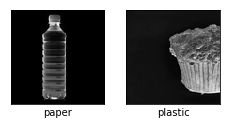

In [22]:
# serialize model to JSON
# model_json = model.to_json()
# with open(rootpath+"\image_classification\model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights(rootpath+"\image_classification\model.h5")
# print("Saved model to disk")

(test_image, label) = load_image_dataset(rootpath+'/image_classification/unknown', maxsize)

predictons=model.predict(test_image)
print(predictions)
display_images(test_image, np.argmax(predictions, axis = 1))
plt.show()
 